In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [2]:
data = np.loadtxt("data.csv", delimiter=";", dtype=int)

In [55]:
years = data[:, 0]
population = data[:, 1]

array([ 76212168,  92228496, 106021537, 123202624, 132164569, 151325798,
       179323175, 203302031, 226542199])

In [31]:
poly1_vander = np.array(years,dtype=np.double)
poly2_vander = np.array(years-1900,dtype=np.double)
poly3_vander = np.array(years-1940,dtype=np.double)
poly4_vander = np.array((years-1940)/40,dtype=np.float64)

In [32]:
def poly1(t, j):
    return np.power(years[t],j, dtype=np.double)

def poly2(t,j):
    return np.power(years[t]-1900, j, dtype=np.double)

def poly3(t,j):
    return np.power(years[t]-1940,j, dtype=np.double)

def poly4(t,j):
    return np.power((years[t]-1940)/40,j, dtype=np.double)

In [33]:
#Tworzenie macierzy
matrix1 = np.vander(poly1_vander, increasing=True)
matrix2 = np.vander(poly2_vander, increasing=True)
matrix3 = np.vander(poly3_vander, increasing=True)
matrix4 = np.vander(poly4_vander, increasing=True)

In [34]:
cond_matrix1 = np.linalg.cond(matrix1)
cond_matrix2 = np.linalg.cond(matrix2)
cond_matrix3 = np.linalg.cond(matrix3)
cond_matrix4 = np.linalg.cond(matrix4)


In [35]:
#Współczynniki uwarunkowania
print(cond_matrix1)
print(cond_matrix2)
print(cond_matrix3)
print(cond_matrix4)

1.3947035536873918e+37
6211148482504961.0
9315536040586.037
1605.4437004786669


In [50]:
#Schemat Hornera
interpolation_factors = np.linalg.solve(matrix4, population.reshape(-1,1))

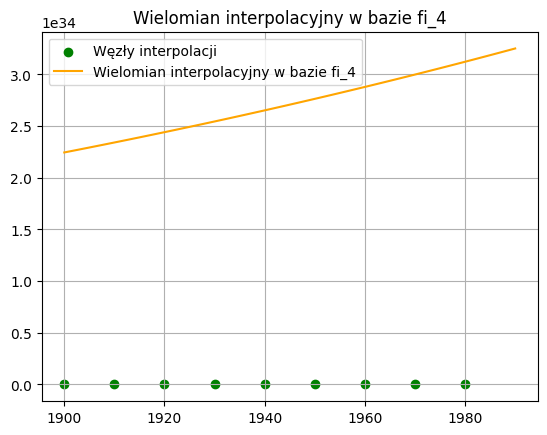

In [58]:
xs = np.arange(1900,1991,1)
ys = np.polyval(interpolation_factors, xs)
plt.title("Wielomian interpolacyjny w bazie fi_4")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie fi_4")
plt.legend()
plt.show()

In [72]:
#Ekstrapolacja wielomianu dla 1990
predicted_value = np.polyval(interpolation_factors, 1990).item()
actual_value = 248709873
error = np.abs(predicted_value - actual_value)/actual_value
print(f"Błąd względny: {error}")



Błąd względny: 1.3071423398961392e+26


In [76]:
#Interpolacja Lagrange'a
lagrange_interpolation_polynomial = lagrange(years,population)

poly1d([-4.80926873e-05,  7.47553142e-01, -5.08357779e+03,  1.97535490e+07,
       -4.79719203e+10,  7.45581850e+13, -7.24218870e+16,  4.01968992e+19,
       -9.76066870e+21])

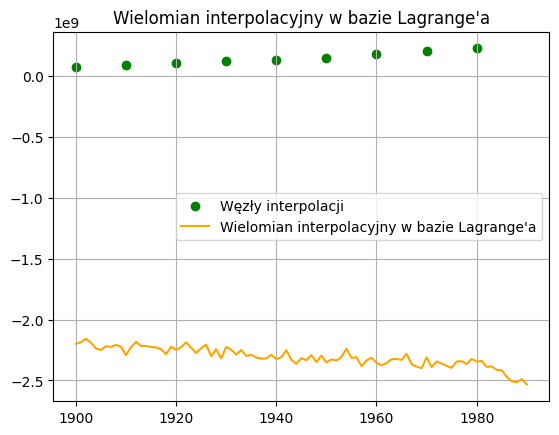

In [80]:
xs = np.arange(1900,1991,1)
ys = np.polyval(lagrange_interpolation_polynomial,xs)
plt.title("Wielomian interpolacyjny w bazie Lagrange'a")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie Lagrange'a")
plt.legend()
plt.show()


In [81]:
#Newton's interpolation
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

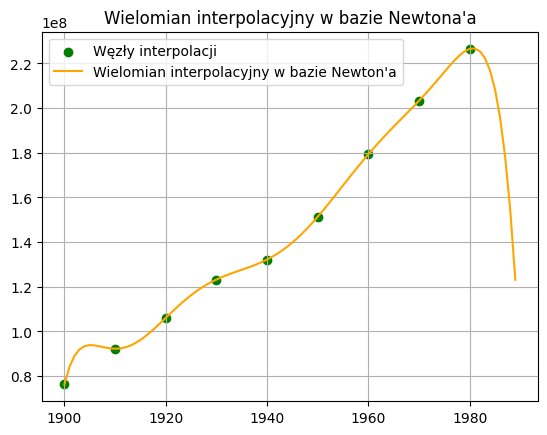

In [82]:
a_s = divided_diff(years, population)[0, :]

xs = np.arange(1900,1990,1)
ys = newton_poly(a_s, years, xs)

plt.title("Wielomian interpolacyjny w bazie Newtona'a")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie Newton'a")
plt.legend()
plt.show()


In [83]:
#Zaokrąglenie populacji
population_rounded = np.round(population / 1e6)*1e6
population_rounded

array([7.60e+07, 9.20e+07, 1.06e+08, 1.23e+08, 1.32e+08, 1.51e+08,
       1.79e+08, 2.03e+08, 2.27e+08])

In [96]:
rounded_interpolation_factors = np.linalg.solve(matrix4, population_rounded)
print("Zaokrąglone:")
print(rounded_interpolation_factors.reshape(-1,1))
print("Niezaokrąglone:")
print(interpolation_factors.reshape(-1,1))

Zaokrąglone:
[[ 1.32000000e+08]
 [ 4.59571429e+07]
 [ 1.00141270e+08]
 [ 1.81111111e+08]
 [-3.56755556e+08]
 [-3.38488889e+08]
 [ 5.70311111e+08]
 [ 1.86920635e+08]
 [-2.94196825e+08]]
Niezaokrąglone:
[[ 1.32164569e+08]
 [ 4.61307656e+07]
 [ 1.02716315e+08]
 [ 1.82527130e+08]
 [-3.74614715e+08]
 [-3.42668456e+08]
 [ 6.06291250e+08]
 [ 1.89175576e+08]
 [-3.15180235e+08]]


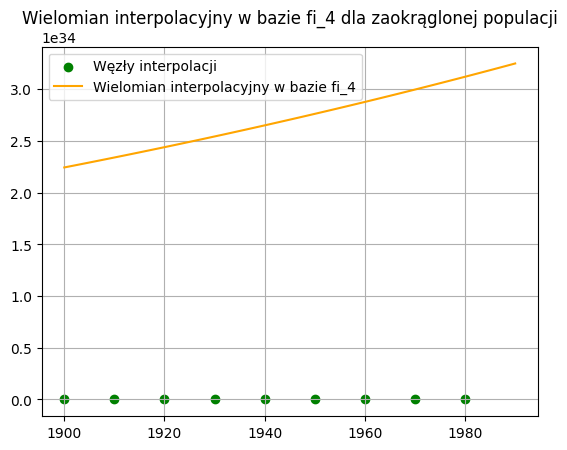

In [88]:
xs = np.arange(1900,1991,1)
ys = np.polyval(rounded_interpolation_factors, xs)
plt.title("Wielomian interpolacyjny w bazie fi_4 dla zaokrąglonej populacji")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie fi_4")
plt.legend()
plt.show()

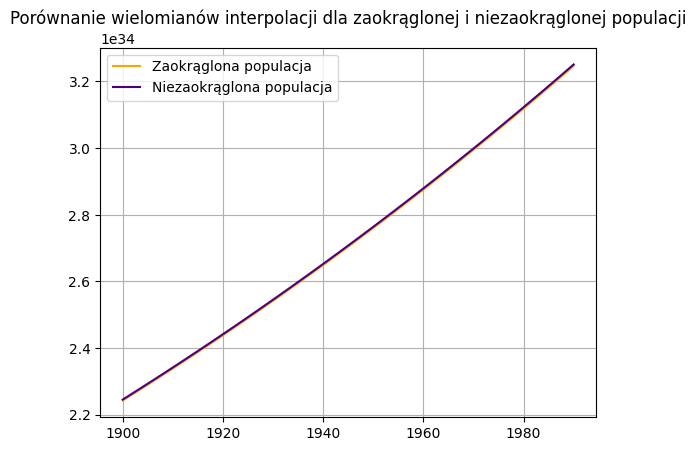

In [92]:
xs = np.arange(1900,1991,1)
ys1 = np.polyval(rounded_interpolation_factors, xs)
ys2 = np.polyval(interpolation_factors,xs)
plt.title("Porównanie wielomianów interpolacji dla zaokrąglonej i niezaokrąglonej populacji")
plt.grid()
plt.plot(xs,ys1, color="orange", label="Zaokrąglona populacja")
plt.plot(xs,ys2, color="indigo", label="Niezaokrąglona populacja")
plt.legend()
plt.show()
#Są identyczne